<a href="https://colab.research.google.com/github/Kakumanu-Harshitha/Stock-Price-Prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Description:
Developed a model for stock price prediction, leveraging time series data to capture temporal dependencies and forecast future prices. The model utilizes historical stock prices to train a deep learning network, ensuring accurate trend predictions and informed investment strategies.

# Steps to Build the model
1.Import libraries

2.Import Dataset

3.Data Preprocessing

*   Finding and filling missing values

*   Split into train and test data
*   Feature Scaling
4.Create Dataset

5.Reshape X values in correct format

6.Build the Model

7.Predict The Model

8.Find the Accuracy

9.Make final Dataset

10.visalize  Actual Vs Predicted values


# 1.Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 2.Import Dataset
Reference:https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction

In [ ]:
df = pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


lets know the shape of the dataset

In [ ]:
df.shape


(1009, 7)

describe the dataset

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.describe(include="object").T


,count,unique,top,freq
Date,1009,1009,2018-02-05,1


# 3.Data Preprocessing

# Finding and filling missing values

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

'Date' feature from the dataset is in the object data type so lets change it into date type.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
data=df[['Date','Open','High','Low','Close']].values

# Split into train and test data

split the dataset into 80% train data and 20% test data

In [ ]:
train_size=int(len(data)*0.8)
train_data,test_data=data[:train_size],data[train_size:]
test_dates=df['Date'][train_size:]

# Feature Scaling

Here I used MinMaxScaler to scale the records between the range 0 t0 1.For the better performance

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_train_data=sc.fit_transform(train_data[:,1:])
scaled_test_data=sc.transform(test_data[:,1:])

# 4.Create Dataset
Dataset should be created in a sequence manner so that these data can be act as an input for recurrent nueral network with a timestep of 60.

In [ ]:
def create_dataset(data,time_step=1):
  X,Y=[],[]
  for i in range(len(data)-time_step-1):
    X.append(data[i:(i+time_step)])
    Y.append(data[i+time_step])
  return np.array(X),np.array(Y)


In [ ]:
look_back=60
X_train,Y_train=create_dataset(scaled_train_data,look_back )
X_test,Y_test=create_dataset(scaled_test_data,look_back )

# 5.Reshape X values in correct format

When we pass it into LSTM neural network it must be 3 Dimensional

In [ ]:

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2])


#6.Build a Model

**Create** **model**: To predict stock price we need to use recurrent nueral networks. So that we can use LSTM which have a good structure.LSTM-Long Short term memory. To maintain and remember all the historic values LSTM layer is good. At last we need to predict the price so we can use dense layer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 4)))
model.add(LSTM(50))
model.add(Dense(4))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 31s 30ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 2/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - loss: 0.0026 - val_loss: 0.0146
Epoch 3/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 4/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 5/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 9.9630e-04 - val_loss: 0.0033
Epoch 6/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 9.5803e-04 - val_loss: 0.0040
Epoch 7/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 8/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 9.0520e-04 - val_loss: 0.0036
Epoch 9/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - loss: 8.1558e-04 - val_loss: 0.0041
Epoch 10/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - loss: 7.3898e-04 - val_loss: 0.0029


# 7.Predict The Model

In [ ]:
x_test = model.predict(X_test)
x_test= sc.inverse_transform(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
y_test=sc.inverse_transform(Y_test)
test_dates=test_dates[look_back+1:].reset_index(drop=True)

#8.Accuracy

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,x_test)

0.9352423548698425

we got the good results with 93.52 % r2 score

# 9.Final Dataframe
lets make a dataframe to compare between actual and predicted values

In [ ]:
result_df=pd.DataFrame({'Date':test_dates,'Actual_open':y_test[:,0],
                        'Actual_high':y_test[:,1],
                        'Actual_low':y_test[:,2],
                        'Actual_close':y_test[:,3],
                        'Predicted_open':x_test[:,0],
                        'Predicted_high':x_test[:,1],
                        'Predicted_low':x_test[:,2],
                        'Predicted_close':x_test[:,3]})
print(result_df)

          Date  Actual_open  Actual_high  Actual_low  Actual_close  \
0   2021-07-19   541.809998   544.059998  527.049988    530.309998   
1   2021-07-20   526.049988   534.909973  522.239990    532.280029   
2   2021-07-21   526.070007   536.640015  520.299988    531.049988   
3   2021-07-22   526.130005   530.989990  505.609985    513.630005   
4   2021-07-23   510.209991   513.679993  507.000000    511.769989   
..         ...          ...          ...         ...           ...   
136 2022-01-31   386.760010   387.000000  372.079987    384.360016   
137 2022-02-01   401.969971   427.699982  398.200012    427.140045   
138 2022-02-02   432.959991   458.480011  425.540039    457.130005   
139 2022-02-03   448.250000   451.980011  426.480011    429.480011   
140 2022-02-04   421.440002   429.260010  404.279999    405.600037   

     Predicted_open  Predicted_high  Predicted_low  Predicted_close  
0        554.998535      556.510315     546.721802       549.214600  
1        542.274048

# 10.Visualize Actual vs predicted values

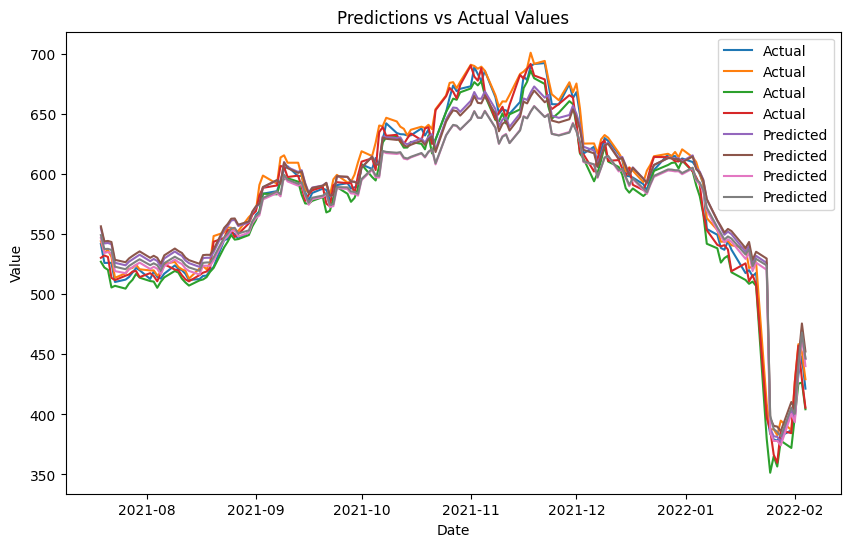

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='Actual')
plt.plot(test_dates, x_test, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Predictions vs Actual Values')
plt.show()